<a href="https://colab.research.google.com/github/Rajat-Gaur/Fraud-detection-credit-card/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_excel('LoanStats_2015_subset.xlsx')

In [4]:
data.loan_status.value_counts()

Fully Paid            196814
Current               151713
Charged Off            63845
Late (31-120 days)      4905
In Grace Period         2757
Late (16-30 days)       1052
Default                    9
Name: loan_status, dtype: int64

In [240]:
df = data.copy()
df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,zip_code,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,0.0,8.0,KS,42.0,65000.0,NaN,Individual,10086.0,41055.0,17.1,0.0,0.0,0.0,0.0,NaN,23.84,NaN,2003-11-01,10+ years,Teacher,12000.0,12000.0,B,MORTGAGE,NaN,61.0,w,0.0,0.0,0.0,253.79,0.0980,2015-12-01,12000.0,Fully Paid,7909.0,NaN,127.0,145.0,4.0,...,2.0,2.0,3.0,6.0,1.0,5.0,100.0,0.0,1.0,0.0,0.0,debt_consolidation,9786.0,0.134,B3,0.0,60 months,Debt consolidation,181540.0,291626.0,37.0,74787.0,65001.0,49500.0,0.0,105910.0,73200.0,Not Verified,660xx,0.613738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,VT,34.0,150000.0,NaN,Individual,61551.0,24661.0,44.0,0.0,0.0,0.0,0.0,NaN,9.54,NaN,1996-02-01,1 year,Director,25000.0,25000.0,A,MORTGAGE,NaN,6.0,w,0.0,0.0,0.0,752.87,0.0532,2015-12-01,25000.0,Current,19339.0,NaN,166.0,238.0,4.0,...,1.0,0.0,0.0,2.0,1.0,1.0,100.0,0.0,1.0,0.0,0.0,credit_card,19339.0,0.425,A1,0.0,36 months,Credit card refinancing,430856.0,512381.0,18.0,44786.0,25447.0,44000.0,7.0,51081.0,45500.0,Not Verified,054xx,0.498170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8.0,IN,50.0,75000.0,NaN,Individual,7176.0,23476.0,59.9,0.0,0.0,0.0,0.0,NaN,31.88,NaN,2002-10-01,10+ years,Engineer,28000.0,28000.0,D,MORTGAGE,NaN,44.0,w,1.0,0.0,0.0,718.51,0.1849,2015-12-01,28000.0,Current,7213.0,NaN,143.0,158.0,4.0,...,1.0,0.0,2.0,2.0,2.0,6.0,100.0,50.0,1.0,0.0,0.0,debt_consolidation,43413.0,0.519,D5,0.0,60 months,Debt consolidation,193745.0,267312.0,46.0,57302.0,13889.0,58500.0,0.0,31758.0,83600.0,Verified,471xx,0.437339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,7.0,OH,71.0,175000.0,NaN,Individual,51015.0,21569.0,50.3,0.0,0.0,0.0,0.0,NaN,18.50,NaN,1997-08-01,2 years,Vice-President,30000.0,30000.0,D,MORTGAGE,NaN,84.0,w,4.0,3.0,1.0,1051.31,0.1577,2015-12-01,30000.0,Fully Paid,12141.0,NaN,118.0,220.0,16.0,...,2.0,2.0,4.0,4.0,0.0,1.0,95.7,33.3,1.0,0.0,0.0,home_improvement,21831.0,0.503,D1,0.0,36 months,Home improvement,408118.0,447599.0,23.0,152571.0,130740.0,43400.0,3.0,146568.0,43400.0,Not Verified,430xx,0.892009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,FL,91.0,44000.0,NaN,Individual,19041.0,0.0,102.4,0.0,0.0,0.0,0.0,NaN,17.56,NaN,2006-06-01,< 1 year,RN,17600.0,17600.0,E,RENT,NaN,83.0,w,0.0,0.0,0.0,465.22,0.1989,2015-12-01,17600.0,Current,5998.0,NaN,112.0,114.0,25.0,...,0.0,0.0,1.0,4.0,0.0,0.0,100.0,100.0,1.0,0.0,0.0,credit_card,12900.0,1.024,E3,0.0,60 months,NaN,133285.0,139633.0,25.0,133285.0,120385.0,12600.0,1.0,127033.0,12600.0,Verified,322xx,0.947667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
df.tail()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,zip_code,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
421092,0.0,6.0,MA,NaN,64400.0,NaN,Individual,3895.0,3752.0,61.3,0.0,1.0,1.0,0.0,NaN,27.19,NaN,2003-10-01,1 year,Painter,12000.0,12000.0,E,RENT,NaN,NaN,w,NaN,NaN,2.0,317.86,0.1999,2015-01-01,12000.0,Charged Off,NaN,NaN,56.0,83.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,66.7,1.0,0.0,0.0,debt_consolidation,8254.0,0.306,E3,0.0,60 months,Debt consolidation,58418.0,96919.0,20.0,58418.0,NaN,9700.0,NaN,69919.0,27000.0,Source Verified,010xx,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421093,0.0,7.0,TN,NaN,35000.0,NaN,Individual,3798.0,2554.0,75.9,0.0,0.0,0.0,0.0,NaN,30.90,NaN,2003-09-01,5 years,Radiologist Technologist,13000.0,13000.0,D,RENT,NaN,NaN,w,NaN,NaN,0.0,316.07,0.1599,2015-01-01,13000.0,Charged Off,NaN,NaN,134.0,108.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,50.0,1.0,1.0,1.0,debt_consolidation,11031.0,0.613,D2,0.0,60 months,Debt consolidation,34178.0,51239.0,22.0,34178.0,NaN,10600.0,NaN,33239.0,18000.0,Verified,378xx,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421094,0.0,1.0,FL,NaN,100000.0,NaN,Individual,4163.0,8434.0,79.8,0.0,0.0,0.0,0.0,NaN,10.83,NaN,2001-12-01,10+ years,Manager Hotel Operations Oasis,20000.0,20000.0,B,RENT,NaN,NaN,f,NaN,NaN,1.0,664.20,0.1199,2015-01-01,20000.0,Fully Paid,NaN,NaN,146.0,155.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,50.0,1.0,1.0,0.0,credit_card,33266.0,0.798,B5,1.0,36 months,Credit card refinancing,33307.0,43740.0,10.0,33307.0,NaN,41700.0,NaN,0.0,41700.0,Verified,331xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Total amount funded in policy code 2: 1944088810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
df.drop(df.tail(2).index, inplace = True)

In [243]:
df.tail()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,zip_code,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
421090,0.0,3.0,NJ,NaN,79000.0,NaN,Individual,35071.0,976.0,89.2,0.0,0.0,0.0,0.0,NaN,3.90,NaN,1974-03-01,10+ years,Director of Maintenance,24000.0,24000.0,B,MORTGAGE,NaN,NaN,f,NaN,NaN,1.0,797.03,0.1199,2015-01-01,24000.0,Fully Paid,NaN,NaN,NaN,488.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,56.5,100.0,1.0,0.0,0.0,home_improvement,8621.0,0.845,B5,0.0,36 months,Home improvement,140285.0,152650.0,23.0,8621.0,NaN,9000.0,NaN,0.0,10200.0,Verified,072xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421091,0.0,2.0,CA,NaN,31000.0,NaN,Individual,3159.0,448.0,95.1,0.0,0.0,0.0,0.0,NaN,28.69,NaN,2004-09-01,8 years,Office Assistant,10000.0,10000.0,B,RENT,NaN,NaN,f,NaN,NaN,0.0,332.10,0.1199,2015-01-01,10000.0,Fully Paid,NaN,NaN,122.0,115.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,1.0,1.0,0.0,debt_consolidation,14037.0,0.821,B5,0.0,36 months,Debt consolidation,25274.0,32950.0,15.0,25274.0,NaN,9200.0,NaN,15850.0,17100.0,Verified,905xx,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421092,0.0,6.0,MA,NaN,64400.0,NaN,Individual,3895.0,3752.0,61.3,0.0,1.0,1.0,0.0,NaN,27.19,NaN,2003-10-01,1 year,Painter,12000.0,12000.0,E,RENT,NaN,NaN,w,NaN,NaN,2.0,317.86,0.1999,2015-01-01,12000.0,Charged Off,NaN,NaN,56.0,83.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,66.7,1.0,0.0,0.0,debt_consolidation,8254.0,0.306,E3,0.0,60 months,Debt consolidation,58418.0,96919.0,20.0,58418.0,NaN,9700.0,NaN,69919.0,27000.0,Source Verified,010xx,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421093,0.0,7.0,TN,NaN,35000.0,NaN,Individual,3798.0,2554.0,75.9,0.0,0.0,0.0,0.0,NaN,30.90,NaN,2003-09-01,5 years,Radiologist Technologist,13000.0,13000.0,D,RENT,NaN,NaN,w,NaN,NaN,0.0,316.07,0.1599,2015-01-01,13000.0,Charged Off,NaN,NaN,134.0,108.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,50.0,1.0,1.0,1.0,debt_consolidation,11031.0,0.613,D2,0.0,60 months,Debt consolidation,34178.0,51239.0,22.0,34178.0,NaN,10600.0,NaN,33239.0,18000.0,Verified,378xx,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421094,0.0,1.0,FL,NaN,100000.0,NaN,Individual,4163.0,8434.0,79.8,0.0,0.0,0.0,0.0,NaN,10.83,NaN,2001-12-01,10+ years,Manager Hotel Operations Oasis,20000.0,20000.0,B,RENT,NaN,NaN,f,NaN,NaN,1.0,664.20,0.1199,2015-01-01,20000.0,Fully Paid,NaN,NaN,146.0,155.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,50.0,1.0,1.0,0.0,credit_card,33266.0,0.798,B5,1.0,36 months,Credit card refinancing,33307.0,43740.0,10.0,33307.0,NaN,41700.0,NaN,0.0,41700.0,Verified,331xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Section A

1) What is the monthly total loan volume in dollars and what is the monthly average loan size?

In [245]:
# Monthly total loan volume in dollar
loan_total = df.groupby('issue_d')['loan_amnt'].sum()

# Monthly average loan size
loan_avg = df.groupby('issue_d')['loan_amnt'].mean()

In [246]:
pd.DataFrame({"loan_total": loan_total, "loan_avg": loan_avg})

,loan_total,loan_avg
issue_d,,
2015-01-01,533132575.0,15185.933717
2015-02-01,366908525.0,15435.781447
2015-03-01,390003275.0,15354.459646
2015-04-01,539401075.0,15225.705676
2015-05-01,483189475.0,15140.835240
2015-06-01,429777175.0,15087.841847
2015-07-01,696238600.0,15148.135416
2015-08-01,555331400.0,15474.875996
2015-09-01,450246800.0,15720.358926


2) What are the charge-off rates by Loan Grade?

In [85]:
df['paid'] = df.loan_status.apply(lambda x: 1 if ((x == 'Charged Off') | (x == 'Default')) else 0)
df.tail()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,zip_code,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,paid
421090,0.0,3.0,NJ,NaN,79000.0,NaN,Individual,35071.0,976.0,89.2,0.0,0.0,0.0,0.0,NaN,3.90,NaN,1974-03-01,10+ years,Director of Maintenance,24000.0,24000.0,B,MORTGAGE,NaN,NaN,f,NaN,NaN,1.0,797.03,0.1199,2015-01-01,24000.0,Fully Paid,NaN,NaN,NaN,488.0,3.0,...,NaN,NaN,NaN,NaN,NaN,56.5,100.0,1.0,0.0,0.0,home_improvement,8621.0,0.845,B5,0.0,36 months,Home improvement,140285.0,152650.0,23.0,8621.0,NaN,9000.0,NaN,0.0,10200.0,Verified,072xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
421091,0.0,2.0,CA,NaN,31000.0,NaN,Individual,3159.0,448.0,95.1,0.0,0.0,0.0,0.0,NaN,28.69,NaN,2004-09-01,8 years,Office Assistant,10000.0,10000.0,B,RENT,NaN,NaN,f,NaN,NaN,0.0,332.10,0.1199,2015-01-01,10000.0,Fully Paid,NaN,NaN,122.0,115.0,17.0,...,NaN,NaN,NaN,NaN,NaN,100.0,100.0,1.0,1.0,0.0,debt_consolidation,14037.0,0.821,B5,0.0,36 months,Debt consolidation,25274.0,32950.0,15.0,25274.0,NaN,9200.0,NaN,15850.0,17100.0,Verified,905xx,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
421092,0.0,6.0,MA,NaN,64400.0,NaN,Individual,3895.0,3752.0,61.3,0.0,1.0,1.0,0.0,NaN,27.19,NaN,2003-10-01,1 year,Painter,12000.0,12000.0,E,RENT,NaN,NaN,w,NaN,NaN,2.0,317.86,0.1999,2015-01-01,12000.0,Charged Off,NaN,NaN,56.0,83.0,5.0,...,NaN,NaN,NaN,NaN,NaN,95.0,66.7,1.0,0.0,0.0,debt_consolidation,8254.0,0.306,E3,0.0,60 months,Debt consolidation,58418.0,96919.0,20.0,58418.0,NaN,9700.0,NaN,69919.0,27000.0,Source Verified,010xx,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
421093,0.0,7.0,TN,NaN,35000.0,NaN,Individual,3798.0,2554.0,75.9,0.0,0.0,0.0,0.0,NaN,30.90,NaN,2003-09-01,5 years,Radiologist Technologist,13000.0,13000.0,D,RENT,NaN,NaN,w,NaN,NaN,0.0,316.07,0.1599,2015-01-01,13000.0,Charged Off,NaN,NaN,134.0,108.0,6.0,...,NaN,NaN,NaN,NaN,NaN,100.0,50.0,1.0,1.0,1.0,debt_consolidation,11031.0,0.613,D2,0.0,60 months,Debt consolidation,34178.0,51239.0,22.0,34178.0,NaN,10600.0,NaN,33239.0,18000.0,Verified,378xx,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
421094,0.0,1.0,FL,NaN,100000.0,NaN,Individual,4163.0,8434.0,79.8,0.0,0.0,0.0,0.0,NaN,10.83,NaN,2001-12-01,10+ years,Manager Hotel Operations Oasis,20000.0,20000.0,B,RENT,NaN,NaN,f,NaN,NaN,1.0,664.20,0.1199,2015-01-01,20000.0,Fully Paid,NaN,NaN,146.0,155.0,5.0,...,NaN,NaN,NaN,NaN,NaN,100.0,50.0,1.0,1.0,0.0,credit_card,33266.0,0.798,B5,1.0,36 months,Credit card refinancing,33307.0,43740.0,10.0,33307.0,NaN,41700.0,NaN,0.0,41700.0,Verified,331xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [86]:
df.paid.value_counts()

0    357241
1     63854
Name: paid, dtype: int64

In [87]:
df.groupby('grade')['paid'].count()

grade
A     73336
B    117606
C    120567
D     62654
E     34948
F      9817
G      2167
Name: paid, dtype: int64

In [88]:
# Charge-off rates for each Loan Grade
df.groupby('grade')['paid'].sum()/df.groupby('grade')['paid'].count()

grade
A    0.045053
B    0.097529
C    0.162217
D    0.235165
E    0.290832
F    0.375980
G    0.430549
Name: paid, dtype: float64

In [89]:
# Charge-off rates for each Loan Sub-Grade
df.groupby('sub_grade')['paid'].sum()/df.groupby('sub_grade')['paid'].count()

sub_grade
A1    0.020852
A2    0.032874
A3    0.041510
A4    0.051724
A5    0.061321
B1    0.072411
B2    0.085066
B3    0.094939
B4    0.108196
B5    0.124125
C1    0.138155
C2    0.153632
C3    0.160240
C4    0.178975
C5    0.187910
D1    0.206397
D2    0.236106
D3    0.235436
D4    0.255432
D5    0.259697
E1    0.264321
E2    0.278824
E3    0.298687
E4    0.310886
E5    0.329545
F1    0.341367
F2    0.362610
F3    0.384928
F4    0.426975
F5    0.432932
G1    0.416010
G2    0.424348
G3    0.432161
G4    0.443983
G5    0.486911
Name: paid, dtype: float64

3) Are there any statistically significant differences in charge-off rate by Loan Grade? Please explain
how you made this determination.

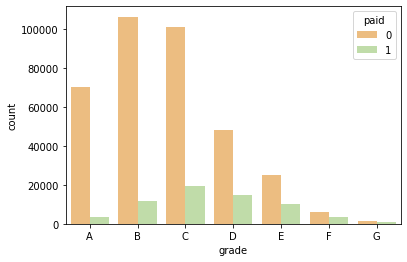

In [90]:
Order=sorted(df.grade.unique())
sns.countplot(x=df.grade,data=df,order=Order,palette='Spectral',hue='paid')
plt.show()

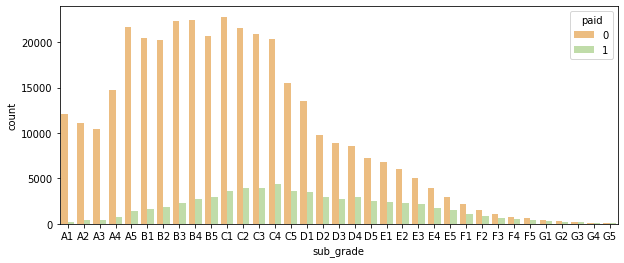

In [91]:
Order=sorted(df.sub_grade.unique())
plt.figure(figsize=(10,4))
sns.countplot(x=df.sub_grade,data=df,order=Order,palette='Spectral',hue='paid')
plt.show()

4) Is Lending Club charging an appropriate interest rate for the risk?

In [92]:
df_lend = df[['grade', 'int_rate', 'loan_amnt', 'paid']]
df_lend['int'] = df.int_rate*df.loan_amnt
interest = df_lend['int'].sum()
risk = df_lend['paid'].sum()/df_lend['paid'].count()*df_lend['loan_amnt'].sum()
pd.DataFrame({'interest': interest, 'risk': risk}, index=[0])

,interest,risk
0,8.305021e+08,9.731532e+08


In [93]:
interest_ser = df_lend.groupby('grade')['int'].sum()
risk_ser = df_lend.groupby('grade')['paid'].sum()/df_lend.groupby('grade')['paid'].count()\
*df_lend.groupby('grade')['loan_amnt'].sum()
pd.DataFrame({'interest': interest_ser, 'risk': risk_ser})

,interest,risk
grade,,
A,7.492078e+07,4.854205e+07
B,1.681733e+08,1.634682e+08
C,2.367600e+08,2.883943e+08
D,1.675063e+08,2.349658e+08
E,1.246774e+08,1.877568e+08
F,4.659412e+07,7.415320e+07
G,1.187026e+07,1.905917e+07


Section B

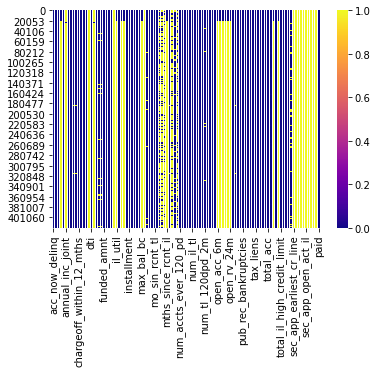

In [37]:
sns.heatmap(df.isnull(), cmap='plasma')
plt.show()

In [94]:
df.isnull().sum().sort_values(ascending=False).head(50)

member_id                              421095
sec_app_open_acc                       421095
id                                     421095
sec_app_earliest_cr_line               421095
sec_app_inq_last_6mths                 421095
sec_app_mort_acc                       421095
sec_app_mths_since_last_major_derog    421095
sec_app_revol_util                     421095
sec_app_chargeoff_within_12_mths       421095
sec_app_open_act_il                    421095
sec_app_collections_12_mths_ex_med     421095
sec_app_num_rev_accts                  421095
desc                                   421050
dti_joint                              420586
annual_inc_joint                       420584
il_util                                402478
mths_since_rcnt_il                     400285
inq_last_12m                           399723
inq_fi                                 399723
open_acc_6m                            399723
open_il_12m                            399723
open_il_24m                       

In [95]:
df[df.mths_since_last_delinq.isnull()].paid.value_counts()

0    174026
1     29936
Name: paid, dtype: int64

In [96]:
df[df.revol_bal_joint.isnull()].paid.value_counts()

0    42541
1     6246
Name: paid, dtype: int64

In [97]:
df[df.mths_since_recent_inq.isnull()].paid.value_counts()

0    40337
1     4262
Name: paid, dtype: int64

In [98]:
df[df.emp_length.isnull()].paid.value_counts()

0    19146
1     4671
Name: paid, dtype: int64

In [99]:
df[df.num_tl_120dpd_2m.isnull()].paid.value_counts()

0    15833
1     3397
Name: paid, dtype: int64

In [100]:
df[df.mo_sin_old_il_acct.isnull()].paid.value_counts()

0    10407
1     1847
Name: paid, dtype: int64

In [101]:
cols_to_drop = df.isnull().sum().sort_values(ascending=False).head(34).index
df = df.drop(columns=cols_to_drop)
df.shape

(421095, 72)

In [102]:
df.isnull().sum().sort_values(ascending=False).head(50)

revol_bal_joint               48787
mths_since_recent_inq         44599
emp_title                     23874
emp_length                    23817
num_tl_120dpd_2m              19230
mo_sin_old_il_acct            12254
percent_bc_gt_75               4239
bc_util                        4227
bc_open_to_buy                 3963
mths_since_recent_bc           3798
revol_util                      162
title                           132
dti                               2
num_rev_accts                     1
installment                       0
int_rate                          0
loan_amnt                         0
issue_d                           0
initial_list_status               0
loan_status                       0
mo_sin_old_rev_tl_op              0
mo_sin_rcnt_rev_tl_op             0
mo_sin_rcnt_tl                    0
inq_last_6mths                    0
paid                              0
home_ownership                    0
grade                             0
mort_acc                    

In [103]:
# pd.set_option('max_colwidth', 1000)
# pd.set_option('max_rows',40)
# pd.set_option('max_columns',1000)
# pd.set_option("display.max_rows", 25)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421095 entries, 0 to 421094
Data columns (total 72 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   acc_now_delinq              421095 non-null  float64       
 1   acc_open_past_24mths        421095 non-null  float64       
 2   addr_state                  421095 non-null  object        
 3   annual_inc                  421095 non-null  float64       
 4   application_type            421095 non-null  object        
 5   avg_cur_bal                 421095 non-null  float64       
 6   bc_open_to_buy              417132 non-null  float64       
 7   bc_util                     416868 non-null  float64       
 8   chargeoff_within_12_mths    421095 non-null  float64       
 9   collections_12_mths_ex_med  421095 non-null  float64       
 10  delinq_2yrs                 421095 non-null  float64       
 11  delinq_amnt                 421095 non-

In [105]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acc_now_delinq,421095.0,0.006087,0.086482,0.0000,0.0000,0.0000,0.0000,1.400000e+01
acc_open_past_24mths,421095.0,4.665000,3.195380,0.0000,2.0000,4.0000,6.0000,6.400000e+01
annual_inc,421095.0,76965.608663,73949.961469,0.0000,46000.0000,65000.0000,91690.5000,9.500000e+06
avg_cur_bal,421095.0,13104.784721,15671.803897,0.0000,3199.0000,7262.0000,17974.5000,5.559250e+05
bc_open_to_buy,417132.0,9636.063992,14774.166134,0.0000,1345.0000,4366.0000,11574.0000,5.599120e+05
bc_util,416868.0,62.228136,27.576378,0.0000,41.5000,65.8000,86.5000,3.182000e+02
chargeoff_within_12_mths,421095.0,0.010420,0.117019,0.0000,0.0000,0.0000,0.0000,1.000000e+01
collections_12_mths_ex_med,421095.0,0.020240,0.157506,0.0000,0.0000,0.0000,0.0000,1.400000e+01
delinq_2yrs,421095.0,0.347397,0.927695,0.0000,0.0000,0.0000,0.0000,3.900000e+01
delinq_amnt,421095.0,13.765184,781.821107,0.0000,0.0000,0.0000,0.0000,1.591770e+05


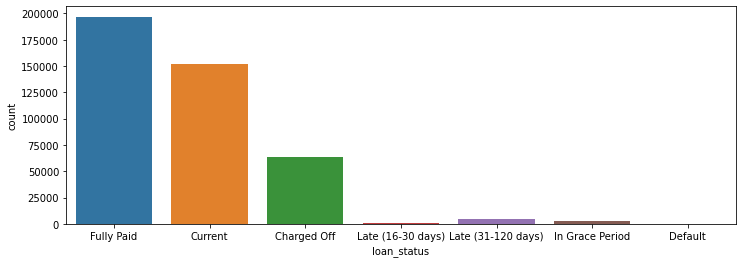

In [106]:
fig = plt.figure(figsize=(12,4))
sns.countplot(x=df['loan_status'])
plt.show()

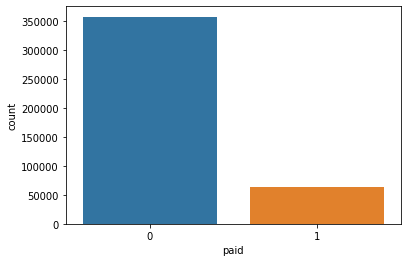

In [107]:
sns.countplot(x=df['paid'])
plt.show()

Text(0.5, 1.0, 'Loan Amount Distribution')

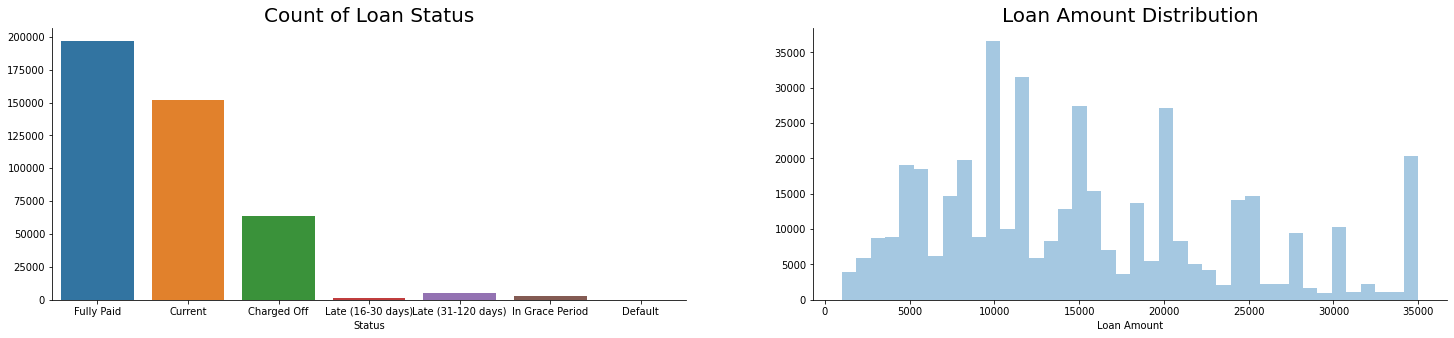

In [108]:
f, axes = plt.subplots(1, 2, figsize=(25,5))
sns.countplot(x='loan_status', data=df, ax=axes[0])
sns.distplot(df['loan_amnt'], kde=False, bins=40, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Status', ylabel='')
axes[0].set_title('Count of Loan Status', size=20)
axes[1].set(xlabel='Loan Amount', ylabel='')
axes[1].set_title('Loan Amount Distribution', size=20)

Text(0.5, 1.0, 'Boxplot between Loan Amount and Loan Status')

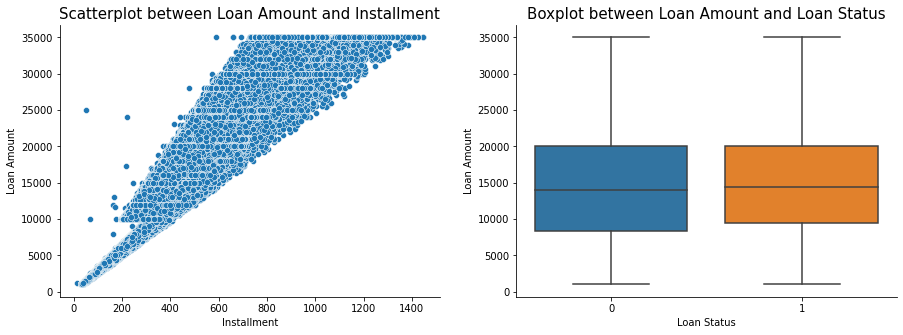

In [109]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(x='installment', y='loan_amnt', data=df, ax=axes[0])
sns.boxplot(x='paid', y='loan_amnt', data=df, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Installment', ylabel='Loan Amount')
axes[0].set_title('Scatterplot between Loan Amount and Installment', size=15)
axes[1].set(xlabel='Loan Status', ylabel='Loan Amount')
axes[1].set_title('Boxplot between Loan Amount and Loan Status', size=15)

Feature creation

In [110]:
df['delinq_diff'] = df.delinq_2yrs - df.chargeoff_within_12_mths
df['ratio_120dpd'] = df.num_tl_120dpd_2m/df.num_accts_ever_120_pd

Correlation Analysis

In [111]:
correlation = df.corr()
correlation[['paid']].sort_values(['paid'], ascending=False)

,paid
paid,1.000000
int_rate,0.239445
acc_open_past_24mths,0.125681
num_tl_op_past_12m,0.111232
inq_last_6mths,0.088914
dti,0.088457
percent_bc_gt_75,0.048835
num_actv_rev_tl,0.048548
num_rev_tl_bal_gt_0,0.047916
bc_util,0.041409


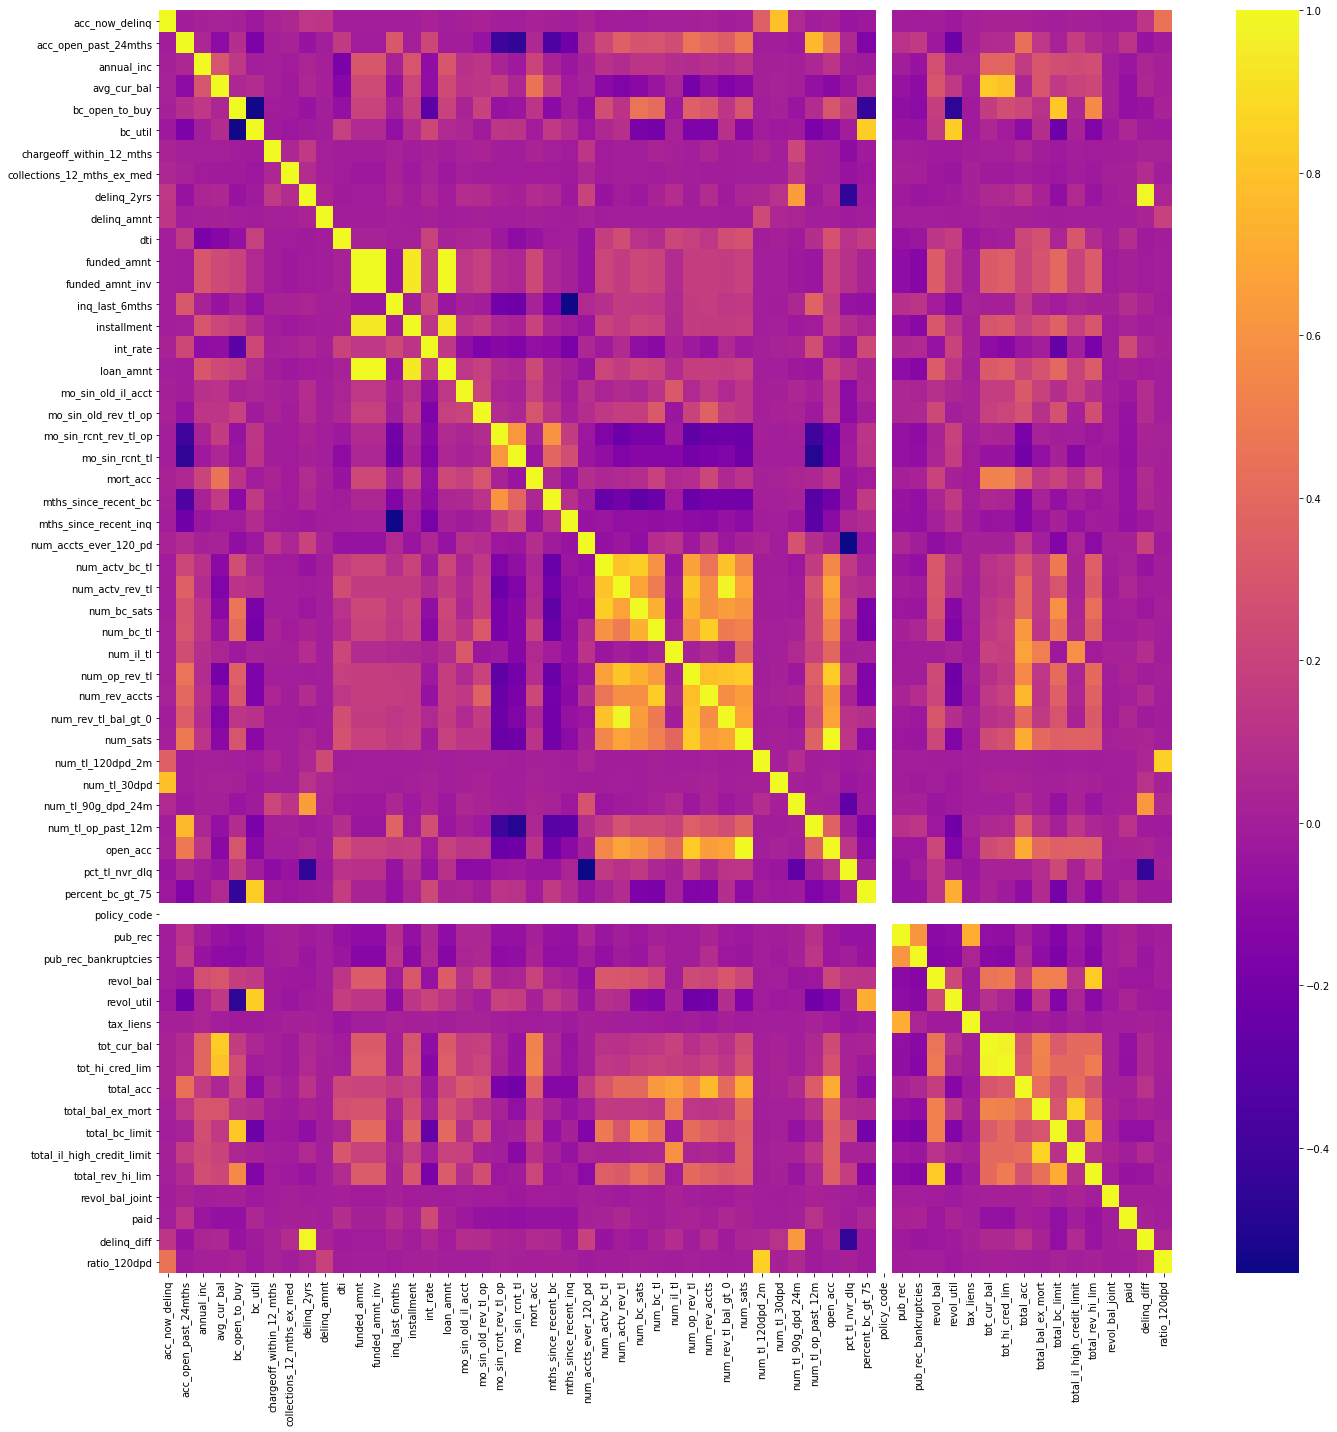

In [112]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=False,cmap='plasma')
fig.tight_layout()

In [113]:
df = df.drop('policy_code', axis=1)

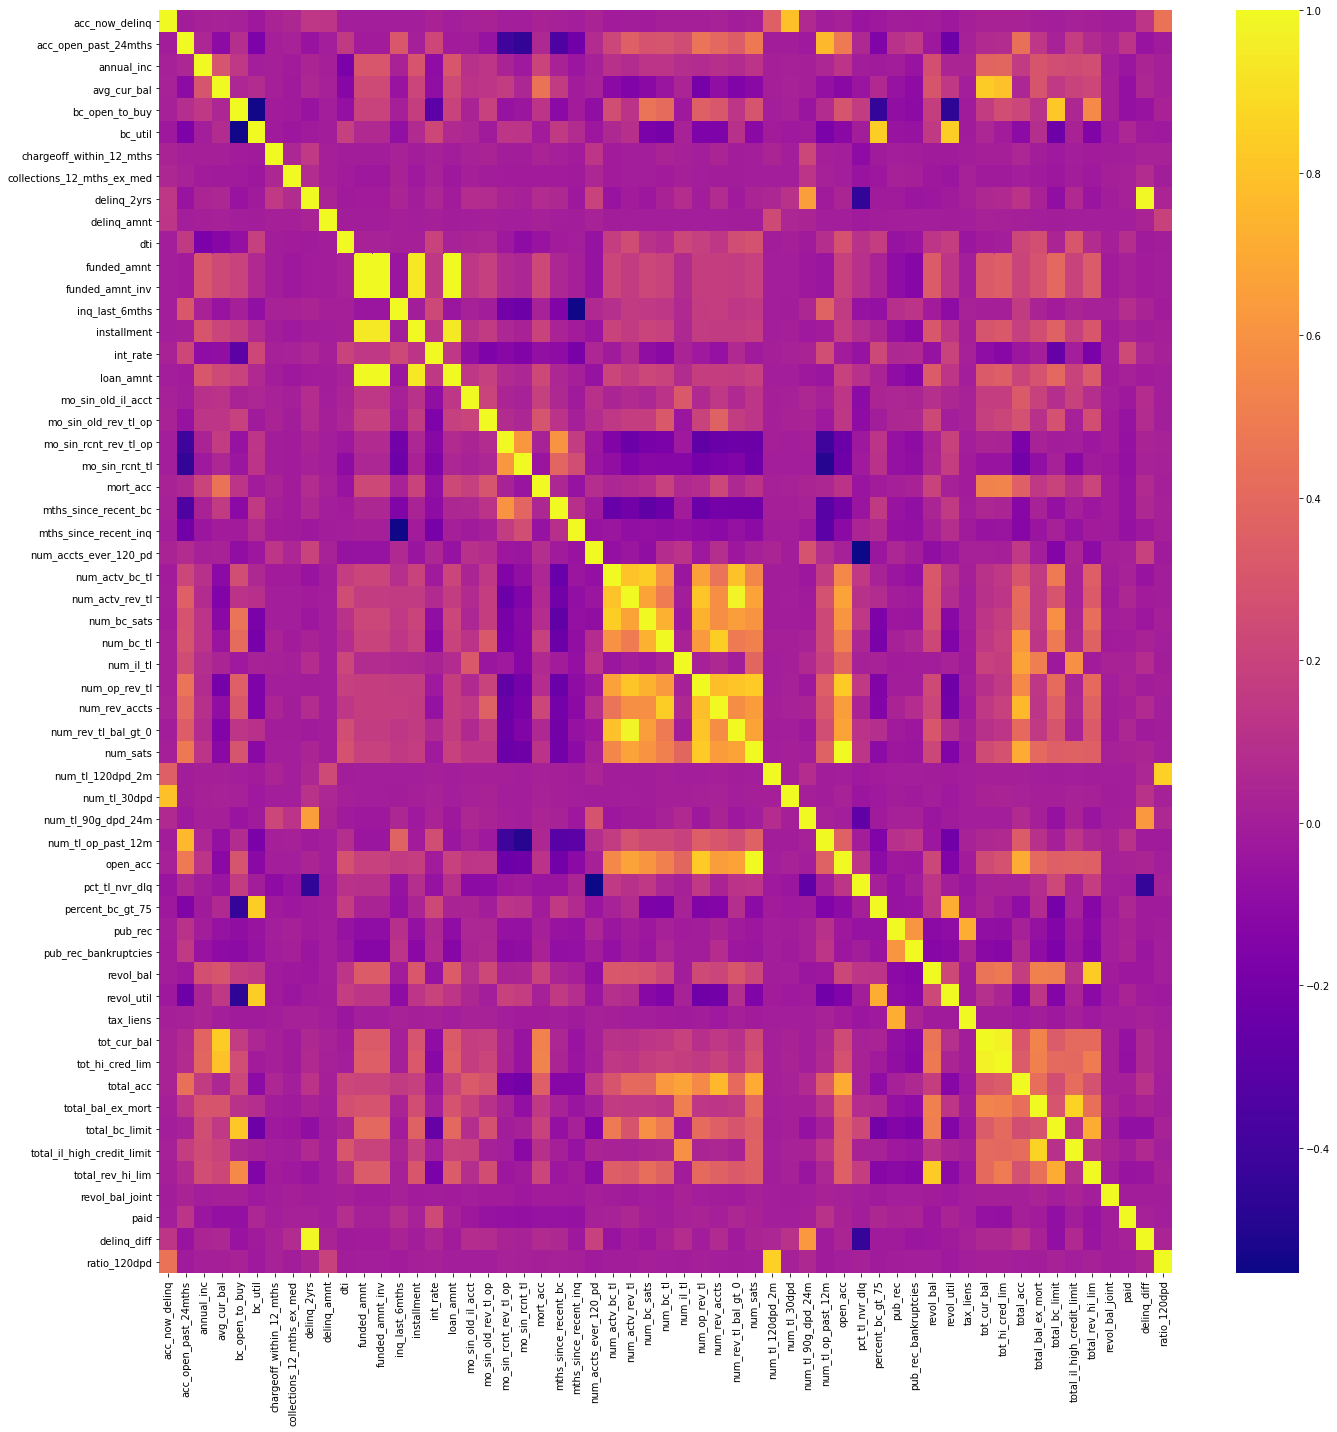

In [114]:
correlation = df.corr()
# correlation[['paid']].sort_values(['paid'], ascending=False)
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=False,cmap='plasma')
fig.tight_layout()

In [115]:
c = correlation.abs()
unstack_corr = c.unstack()
pairs = unstack_corr.sort_values(ascending=False)

corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']


# check feature pairs above 0.8 in correlation

cond1 = (corr_pairs.feature1 != corr_pairs.feature2)
cond2 = (corr_pairs['corr']>0.8)

corr_pairs[cond1 & cond2]

,feature1,feature2,corr
1,funded_amnt,funded_amnt_inv,0.999994
2,num_sats,open_acc,0.998602
3,delinq_diff,delinq_2yrs,0.992015
4,num_rev_tl_bal_gt_0,num_actv_rev_tl,0.980849
5,tot_hi_cred_lim,tot_cur_bal,0.974943
6,funded_amnt,installment,0.941181
7,funded_amnt_inv,installment,0.941163
8,total_bal_ex_mort,total_il_high_credit_limit,0.864517
9,ratio_120dpd,num_tl_120dpd_2m,0.850086
10,bc_util,percent_bc_gt_75,0.844485


In [116]:
df.funded_amnt.corr(df.loan_amnt)

1.0

In [117]:
cols_to_drop = ['bc_util', 'funded_amnt', 'funded_amnt_inv', 'installment', 'num_actv_bc_tl',
                'num_actv_rev_tl', 'num_bc_tl', 'num_op_rev_tl', 'num_sats', 'tot_cur_bal',
                'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'delinq_diff',
                'ratio_120dpd']
df = df.drop(columns=cols_to_drop)
df.shape

(421095, 58)

Separating the numeric and categorical columns

In [118]:
numeric_ = df.select_dtypes(exclude=['object']).copy()
print(numeric_.shape)
# numeric_.sample(5)

(421095, 44)


In [119]:
cat_ = df.select_dtypes(include=['object']).copy()
print(cat_.shape)
# cat_.sample(5)

(421095, 14)


Univariate analysis of Numerical features

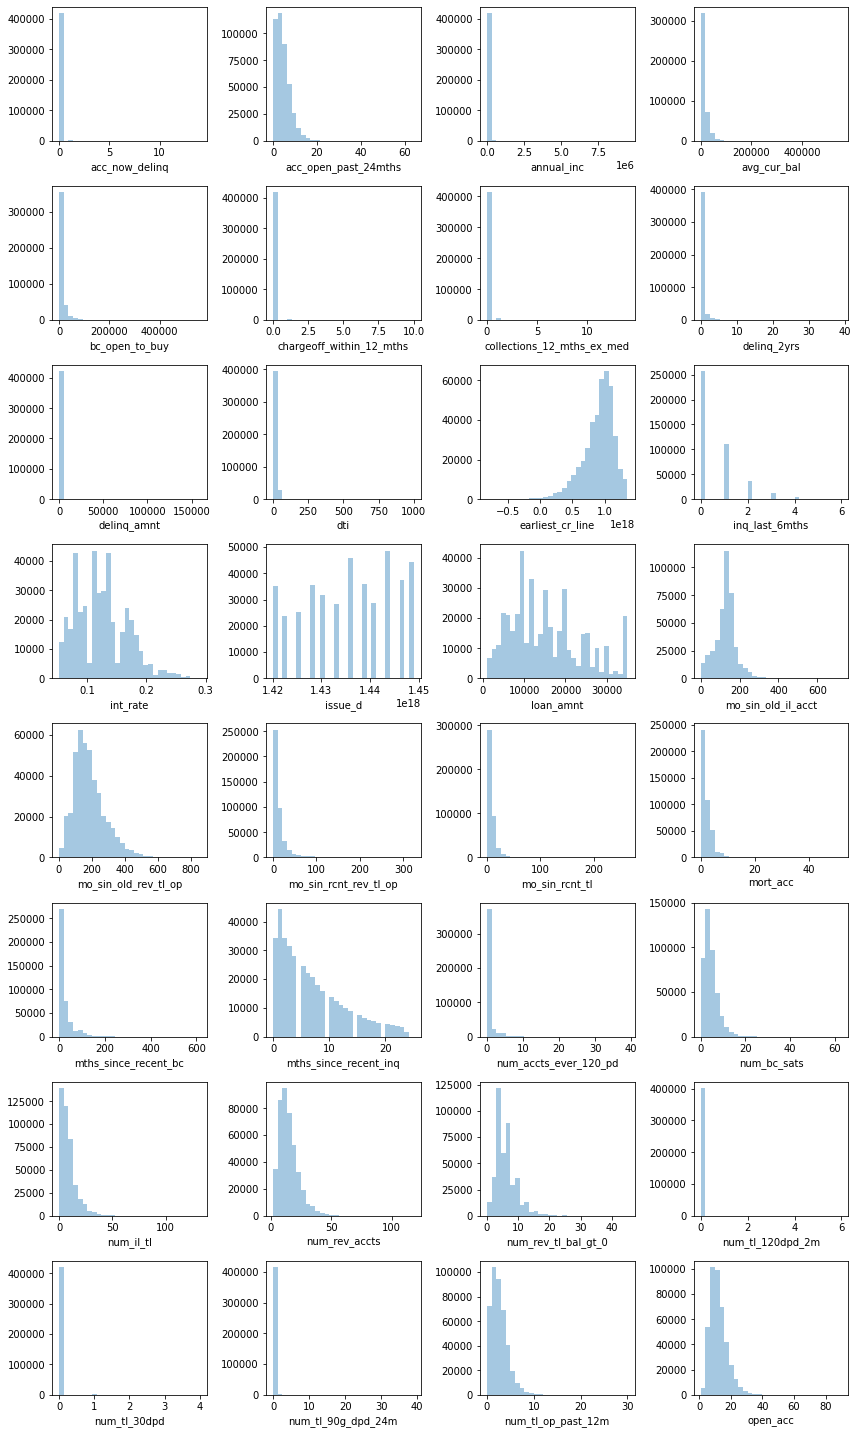

In [120]:
fig = plt.figure(figsize=(12,20))
for index,col in enumerate(numeric_.iloc[:,:32]):
    plt.subplot(8,4,index+1)
    sns.distplot(numeric_.iloc[:,:32].loc[:,col].dropna(), kde=False,bins=30)
fig.tight_layout(pad=1.0)

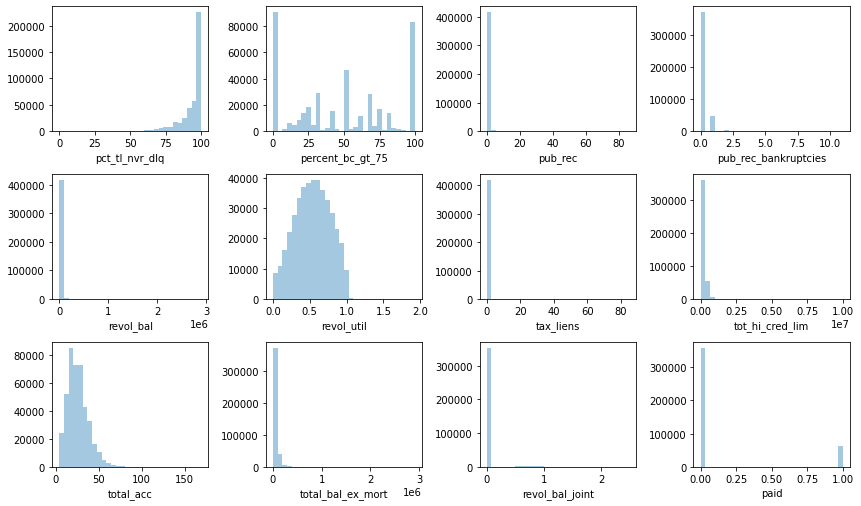

In [121]:
fig = plt.figure(figsize=(12,16))
for index,col in enumerate(numeric_.iloc[:,32:]):
    plt.subplot(7,4,index+1)
    sns.distplot(numeric_.iloc[:,32:].loc[:,col].dropna(), kde=False,bins=30)
fig.tight_layout(pad=1.0)

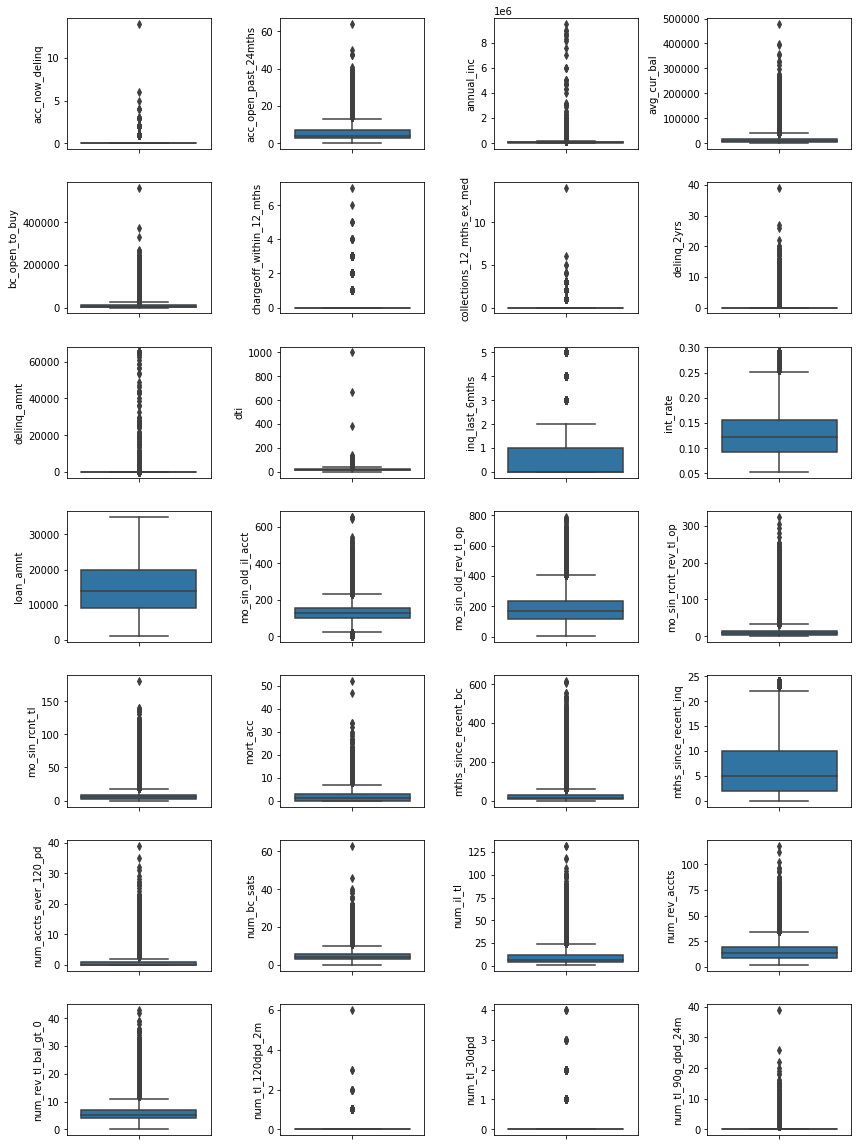

In [122]:
fig = plt.figure(figsize=(12,16))
for index,col in enumerate(numeric_.drop(['earliest_cr_line', 'issue_d'], axis=1).iloc[:,:28]):
    plt.subplot(7,4,index+1)
    sns.boxplot(data = numeric_.drop(['earliest_cr_line', 'issue_d'], axis=1).iloc[:,:28].dropna(), y = col)
fig.tight_layout(pad=1.0)

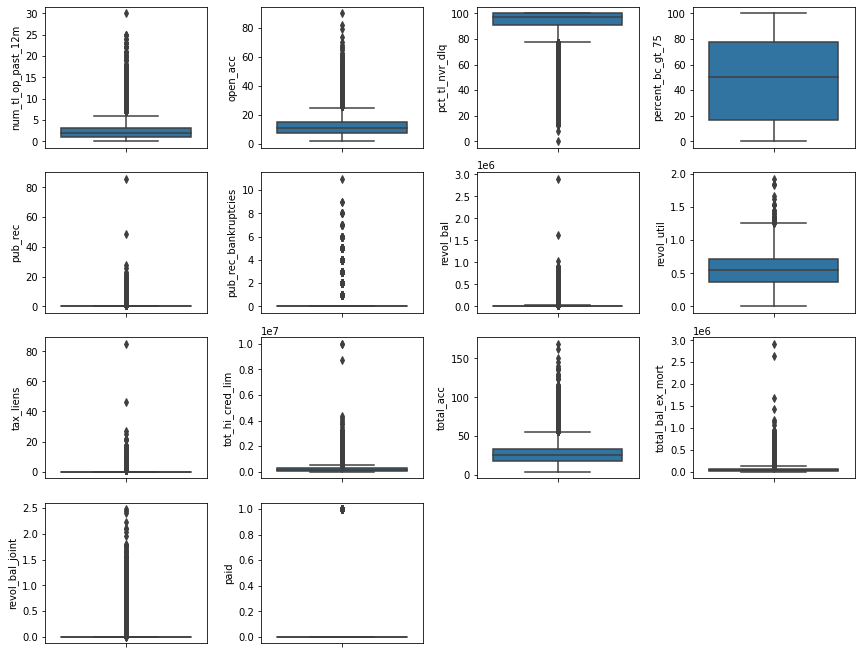

In [123]:
fig = plt.figure(figsize=(12,16))
for index,col in enumerate(numeric_.drop(['earliest_cr_line', 'issue_d'], axis=1).iloc[:,28:]):
    plt.subplot(7,4,index+1)
    sns.boxplot(data = numeric_.drop(['earliest_cr_line', 'issue_d'], axis=1).iloc[:,28:].dropna(), y = col)
fig.tight_layout(pad=1.0)

Anomaly detection

In [125]:
numeric_2 = numeric_.drop(['issue_d', 'earliest_cr_line'], axis=1)
numeric_2 = numeric_2.dropna()

from sklearn.decomposition import PCA
pca = PCA(0.90)
projected = pca.fit_transform(numeric_2)
print(numeric_2.shape)
print(projected.shape)

(317664, 42)
(317664, 2)


In [129]:
from scipy import stats
projected=stats.zscore(projected)
df_anom = pd.DataFrame(data=projected, index=range(0,317664), columns=['PC1', 'PC2'])
df_anom['score1']=df_anom.sum(axis=1)
df_anom.shape

(317664, 3)

In [131]:
from keras.layers import Input, Dense
from keras.models import Model
input_dim = 2
encoding_dim = 2
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None


In [134]:
autoen_ = autoencoder.fit(projected, projected)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(projected)
data_autoen = pd.DataFrame(data=encoded_data)
sum=data_autoen.sum(axis=1)
data_autoen['score1']=df_anom.loc[:,'score1']
data_autoen['score2']=abs(sum-data_autoen['score1'])
df_anom['score2']=data_autoen['score2']
df_anom['weighted_avg']=(df_anom['score1']/(df_anom['score1']+df_anom['score2']))*\
                  df_anom.score1+(df_anom['score2']/(df_anom['score1']+df_anom['score2']))*df_anom.score2
df_anom.sort_values('weighted_avg', ascending=True).head(10)

,PC1,PC2,score1,score2,weighted_avg
286844,0.068620,-0.290057,-0.221437,0.221435,-41892.318303
292937,-0.180081,-0.363294,-0.543375,0.543314,-9759.658015
183086,-0.231327,-0.465385,-0.696712,0.696608,-9308.465963
252607,-0.213740,-0.430380,-0.644120,0.643999,-6809.591065
138824,0.137330,-0.585677,-0.448346,0.448283,-6292.134792
90557,-0.285434,-0.573277,-0.858711,0.858453,-5704.583583
315607,-0.325337,-0.652842,-0.978180,0.977813,-5216.845213
231987,0.184923,-0.790482,-0.605559,0.605412,-4978.742569
199524,-0.236874,-0.476614,-0.713488,0.713192,-3435.817767
257919,-0.147103,-0.297762,-0.444865,0.444659,-1920.299947


In [137]:
df.iloc[286844,:]

acc_now_delinq                                  0
acc_open_past_24mths                            1
addr_state                                     GA
annual_inc                                  70000
application_type                       Individual
avg_cur_bal                                 43622
bc_open_to_buy                               8974
chargeoff_within_12_mths                        0
collections_12_mths_ex_med                      0
delinq_2yrs                                     2
delinq_amnt                                     0
dti                                         16.47
earliest_cr_line              2000-07-01 00:00:00
emp_length                              10+ years
emp_title                             Underwriter
grade                                           B
home_ownership                           MORTGAGE
initial_list_status                             f
inq_last_6mths                                  0
int_rate                                   0.0999


In [135]:
df_anom.sort_values('weighted_avg', ascending=False).head(10)

,PC1,PC2,score1,score2,weighted_avg
82563,-0.309497,-0.620548,-0.930045,0.930466,4111.748876
99346,-0.242227,-0.486730,-0.728957,0.729230,3894.921285
206334,-0.257997,-0.518092,-0.776089,0.776406,3807.638677
139314,-0.181996,-0.366849,-0.548845,0.549054,2876.663725
164654,-0.314566,-0.630374,-0.944940,0.945643,2542.907816
137996,-0.184446,-0.371690,-0.556136,0.556385,2487.447120
13253,-0.146077,-0.295354,-0.441431,0.441606,2223.711050
288780,-0.138590,-0.280448,-0.419039,0.419212,2028.346023
145190,0.132992,-0.566724,-0.433732,0.433944,1773.134543
6620,0.112194,-0.477297,-0.365103,0.365282,1494.621216


In [138]:
df.iloc[82563,:]

acc_now_delinq                                      0
acc_open_past_24mths                                4
addr_state                                         GA
annual_inc                                     150000
application_type                           Individual
avg_cur_bal                                     58816
bc_open_to_buy                                  10551
chargeoff_within_12_mths                            0
collections_12_mths_ex_med                          0
delinq_2yrs                                         1
delinq_amnt                                         0
dti                                             36.48
earliest_cr_line                  1990-04-01 00:00:00
emp_length                                   < 1 year
emp_title                       Senior Vice President
grade                                               C
home_ownership                               MORTGAGE
initial_list_status                                 w
inq_last_6mths              

Univariate analysis of Categorical features

In [139]:
cat_.emp_title.value_counts().head(20)

Teacher             8070
Manager             6802
Owner               3849
Registered Nurse    3209
RN                  3151
Supervisor          3016
Sales               2588
Project Manager     2364
Driver              2273
Office Manager      2115
owner               1993
Director            1969
General Manager     1915
manager             1826
teacher             1743
President           1683
Engineer            1622
driver              1462
Vice President      1408
Attorney            1323
Name: emp_title, dtype: int64

In [140]:
cat_.emp_length.isnull().sum()

23817

In [141]:
cat_['paid'] = cat_.loan_status.apply(lambda x: 1 if ((x == 'Charged Off') | (x == 'Default')) else 0)
cat_.tail()

,addr_state,application_type,emp_length,emp_title,grade,home_ownership,initial_list_status,loan_status,purpose,sub_grade,term,title,verification_status,zip_code,paid
421090,NJ,Individual,10+ years,Director of Maintenance,B,MORTGAGE,f,Fully Paid,home_improvement,B5,36 months,Home improvement,Verified,072xx,0
421091,CA,Individual,8 years,Office Assistant,B,RENT,f,Fully Paid,debt_consolidation,B5,36 months,Debt consolidation,Verified,905xx,0
421092,MA,Individual,1 year,Painter,E,RENT,w,Charged Off,debt_consolidation,E3,60 months,Debt consolidation,Source Verified,010xx,1
421093,TN,Individual,5 years,Radiologist Technologist,D,RENT,w,Charged Off,debt_consolidation,D2,60 months,Debt consolidation,Verified,378xx,1
421094,FL,Individual,10+ years,Manager Hotel Operations Oasis,B,RENT,f,Fully Paid,credit_card,B5,36 months,Credit card refinancing,Verified,331xx,0


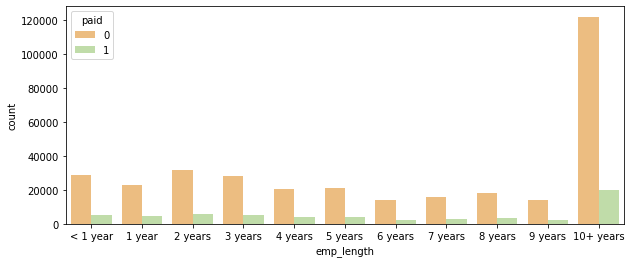

In [142]:
plt.figure(figsize=(10,4))
cat_.emp_length.value_counts()
sns.countplot(x=cat_.emp_length,data=cat_,palette='Spectral',order=[ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years'],hue='paid')
plt.show()

MORTGAGE    207683
RENT        167644
OWN          45766
ANY              2
Name: home_ownership, dtype: int64

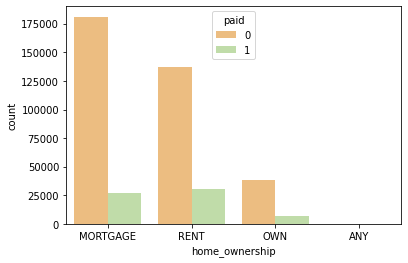

In [143]:
sns.countplot(x=cat_.home_ownership,data=cat_,palette='Spectral',hue='paid')
cat_.home_ownership.value_counts()

In [144]:
cat_.verification_status.value_counts()

Source Verified    179565
Verified           123016
Not Verified       118514
Name: verification_status, dtype: int64

In [145]:
cat_.purpose.value_counts()

debt_consolidation    250020
credit_card           102025
home_improvement       25293
other                  19204
major_purchase          7449
medical                 3938
car                     3466
small_business          3364
moving                  2420
vacation                2249
house                   1438
renewable_energy         224
wedding                    4
educational                1
Name: purpose, dtype: int64

In [146]:
cat_.title.value_counts()

Debt consolidation                         249926
Credit card refinancing                    102056
Home improvement                            25264
Other                                       19179
Major purchase                               7434
Medical expenses                             3926
Car financing                                3475
Business                                     3357
Moving and relocation                        2422
Vacation                                     2246
Home buying                                  1440
Green loan                                    223
DebtC                                           1
Paying off higher interest cards & auto         1
Trying to come back to reality!                 1
Prescription Drug and Medical Costs             1
new kitchen for momma!                          1
odymeds                                         1
new day                                         1
considerate                                     1


Individual    420584
Joint App        511
Name: application_type, dtype: int64

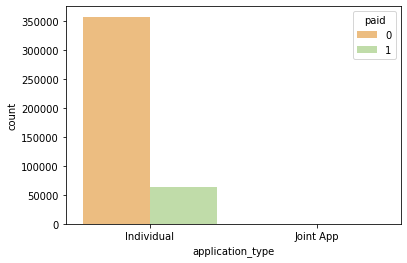

In [147]:
sns.countplot(x=cat_.application_type,data=cat_,palette='Spectral',hue='paid')
cat_.application_type.value_counts()

In [148]:
cols_to_drop = ['emp_title', 'title']
df = df.drop(columns=cols_to_drop)
df.shape

(421095, 56)

In [149]:
df.isnull().sum().sort_values(ascending=False).head(10)

revol_bal_joint          48787
mths_since_recent_inq    44599
emp_length               23817
num_tl_120dpd_2m         19230
mo_sin_old_il_acct       12254
percent_bc_gt_75          4239
bc_open_to_buy            3963
mths_since_recent_bc      3798
revol_util                 162
dti                          2
dtype: int64

In [150]:
df = df.dropna()
df.isnull().sum().sort_values(ascending=False).head(10)

paid                     0
revol_bal_joint          0
mo_sin_rcnt_tl           0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
mo_sin_old_il_acct       0
loan_status              0
loan_amnt                0
issue_d                  0
int_rate                 0
dtype: int64

In [151]:
df.shape

(302863, 56)

In [152]:
df.paid.value_counts()

0    255231
1     47632
Name: paid, dtype: int64

In [153]:
mapp = {'< 1 year':0.5,
        '1 year':1,
        '2 years':2,
        '3 years':3,
        '4 years':4,
        '5 years':5,
        '6 years':6,
        '7 years':7,
        '8 years':8,
        '9 years':9,
        '10+ years':10}

df['emp_length'] = df['emp_length'].map(mapp)

In [154]:
l1 = df.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df['term'] = df['term'].map(d)

In [155]:
df.earliest_cr_line.value_counts()

2002-08-01    2521
2001-08-01    2447
2003-09-01    2386
2002-09-01    2269
2003-08-01    2243
              ... 
1963-10-01       1
1959-06-01       1
1962-06-01       1
1962-10-01       1
1959-11-01       1
Name: earliest_cr_line, Length: 638, dtype: int64

In [156]:
## Transform the variable "earliest reported credit line was opened" into
## the number of years since the earliest reported credit line was opened
## The name of this new variable is 'length_credit_history'
df['length_credit_history'] = (pd.to_datetime('2016-01-01 00:00')-df.earliest_cr_line)/np.timedelta64(1,'Y')
df = df.drop('earliest_cr_line', axis=1)

In [157]:
df.issue_d.value_counts()
df = df.drop('issue_d', axis=1)

In [158]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['addr_state', 'application_type', 'grade', 'home_ownership',
       'initial_list_status', 'loan_status', 'purpose', 'sub_grade',
       'verification_status', 'zip_code'],
      dtype='object')

In [159]:
print(df.verification_status.unique())
print(df.application_type.unique())
print(df.initial_list_status.unique())
print(df.purpose.unique())
print(df.home_ownership.unique())

['Not Verified' 'Verified' 'Source Verified']
['Individual' 'Joint App']
['w' 'f']
['debt_consolidation' 'home_improvement' 'credit_card' 'other' 'car'
 'small_business' 'major_purchase' 'house' 'medical' 'vacation' 'moving'
 'renewable_energy' 'wedding' 'educational']
['MORTGAGE' 'RENT' 'OWN' 'ANY']


In [160]:
df = pd.get_dummies(df, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df = pd.get_dummies(df, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df = pd.get_dummies(df, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df = pd.get_dummies(df, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)
df = pd.get_dummies(df, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)

In [161]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['addr_state', 'grade', 'loan_status', 'sub_grade', 'zip_code'], dtype='object')


In [162]:
df = df.drop(columns=['addr_state', 'loan_status', 'zip_code'])
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['grade', 'sub_grade'], dtype='object')


In [163]:
cols_to_drop = ['grade', 'sub_grade', 'int_rate']
df = df.drop(columns=cols_to_drop)
df.shape

(302863, 64)

In [164]:
df.paid.value_counts()

0    255231
1     47632
Name: paid, dtype: int64

In [216]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.metrics import classification_report #for classification_report
from sklearn.metrics import confusion_matrix #for confusion matrix

X = df.drop(["paid"],axis=1)
y = df["paid"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((212004, 63), (90859, 63), (212004,), (90859,))

In [217]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
scaler = minmax.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

KS test

In [167]:
import scipy.stats as sps

goods = df[df['paid'] == 1]
bads = df[df['paid'] == 0]

numgoods=len(goods)
numbads=len(bads)

KSFDR = pd.DataFrame(columns=['Field','KS'])
for column in df.drop('paid', axis=1):
    KSFDR = KSFDR.append({'Field': column, 'KS': sps.ks_2samp(goods[column],bads[column])[0]}, ignore_index=True)
KSFDR['rank_KS'] = KSFDR['KS'].rank(ascending = True)
KSFDR.sort_values(by=['rank_KS'], ascending=False)

,Field,KS,rank_KS
1,acc_open_past_24mths,0.131463,63.0
28,num_tl_op_past_12m,0.119404,62.0
37,term,0.118206,61.0
38,tot_hi_cred_lim,0.108807,60.0
3,avg_cur_bal,0.103038,59.0
...,...,...,...
56,renewable_energy,0.000183,5.0
52,major_purchase,0.000131,4.0
45,Joint App,0.000060,3.0
59,wedding,0.000008,2.0


In [169]:
KSFDR[KSFDR.KS>.1]

,Field,KS,rank_KS
1,acc_open_past_24mths,0.131463,63.0
3,avg_cur_bal,0.103038,59.0
9,dti,0.102583,58.0
28,num_tl_op_past_12m,0.119404,62.0
37,term,0.118206,61.0
38,tot_hi_cred_lim,0.108807,60.0


Backward selection using Recursive Feature selection (with Cross-validation)

Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.


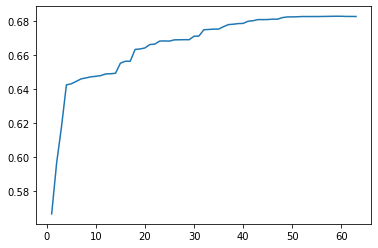

In [548]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score as acc
from sklearn.feature_selection import RFECV
model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=2, verbose=3, n_jobs=-1, scoring='roc_auc')
rfecv.fit(X_train, y_train)
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), X.columns)),
                            columns = ['ranking', 'variable'])
rfecvgrid = pd.Series(rfecv.grid_scores_)
plt.figure()
plt.plot(range(1,len(rfecvgrid)+1), rfecvgrid)
plt.show()

In [549]:
var_selected

,ranking,variable
0,1,Joint App
1,1,MORTGAGE
2,1,OWN
3,1,RENT
4,1,Source Verified
...,...,...
58,1,wedding
59,2,debt_consolidation
60,3,num_il_tl
61,4,vacation


Forward selection (rejected, as this takes too much time and processing, even on a GPU)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(model,
           k_features=50,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


In [146]:
feat_cols = list(sfs1.k_feature_idx_)
feat2 = [x + 1 for x in feat_cols]

X_trn,X_tst,y_trn,y_tst = train_test_split(X.iloc[:, feat_cols],y,test_size=0.3,random_state=42)
X_trn.shape,X_tst.shape,y_trn.shape,y_tst.shape

((211871, 6), (90802, 6), (211871,), (90802,))

In [147]:
model.fit(X_trn, y_trn)
y_pred = model.predict(X_tst)
print('Training accuracy on selected features: %.3f' % acc(y_tst, y_pred))

Training accuracy on selected features: 0.843


Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
pred_lr = model.predict(X_test)
print('-'*30)
print('Accuracy of Logistic Regression: {:.2f}'.format(accuracy_score(pred_lr,y_test)*100))
print('-'*40)
cross_val_lr = cross_val_score(model,X,y,cv=5,scoring='accuracy')
print('Cross Validation Score of Logistic Regression: {:.2f}'.format(cross_val_lr.mean()*100))
print('-'*50)
y_pred_lr = cross_val_predict(model,X,y,cv=5)

------------------------------
Accuracy of Logistic Regression: 84.22
----------------------------------------
Cross Validation Score of Logistic Regression: 84.27
--------------------------------------------------


In [219]:
coef = pd.DataFrame({"feature": X.columns, "coefficient": model.coef_[0]})
coef.reindex(coef.coefficient.abs().sort_values(ascending=False).index)

,feature,coefficient
9,dti,8.551104
4,bc_open_to_buy,-5.043523
1,acc_open_past_24mths,4.512948
7,delinq_2yrs,3.071939
38,tot_hi_cred_lim,-2.413005
...,...,...
10,emp_length,-0.056322
36,tax_liens,0.040861
22,num_il_tl,0.029151
58,vacation,0.025147


In [220]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,f1,support=score(y_test, pred_lr,average='weighted')
print('Precision: {0:.2f}, Recall: {1:.2f}, F1: {2:.2f}'.format(precision, recall, f1))

Precision: 0.78, Recall: 0.84, F1: 0.77


In [221]:
pred = pd.DataFrame(model.predict_proba(X_test))
pred['y_pred'] = pred.iloc[:,1].apply(lambda x: 1 if x<0.1 else 0)
pred = pd.concat([pred,pd.DataFrame(y_test.values,columns=['y_test'])], axis=1)

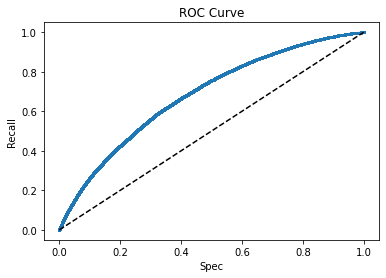

AUC : 0.6837503433718867


In [222]:
fpr, tpr, threshold = roc_curve(y_test, model.decision_function(X_test))

plt.plot(fpr, tpr, 'o-', ms = 2, label="Log Reg")
plt.legend
plt.plot([0,1],[0,1], 'k--', label="abs")
plt.xlabel('Spec')
plt.ylabel('Recall')
plt.title('ROC Curve')
plt.show()

print('AUC : {}'.format(auc(fpr, tpr)))

With SMOTE

In [223]:
print(X.shape, y.shape, y.sum())

from imblearn.over_sampling import SMOTE
X2, y2 = SMOTE().fit_resample(X, y)
print(X2.shape, y2.shape, y2.sum())

(302863, 63) (302863,) 47632
(510462, 63) (510462,) 255231


In [224]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=42)
X_train2.shape,X_test2.shape,y_train2.shape,y_test2.shape

((357323, 63), (153139, 63), (357323,), (153139,))

In [225]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
scaler2 = minmax.fit(X_train2)
X_train2 = scaler2.transform(X_train2)
X_test2 = scaler2.transform(X_test2)

In [212]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_train2,y_train2)
pred_lr2 = model2.predict(X_test2)
print('-'*30)
print('Accuracy of Logistic Regression: {:.2f}'.format(accuracy_score(pred_lr2,y_test2)*100))
print('-'*40)
cross_val_lr2 = cross_val_score(model2,X2,y2,cv=5,scoring='accuracy')
print('Cross Validation Score of Logistic Regression: {:.2f}'.format(cross_val_lr2.mean()*100))
print('-'*50)
y_pred_lr2 = cross_val_predict(model2,X2,y2,cv=5)

------------------------------
Accuracy of Logistic Regression: 64.48
----------------------------------------
Cross Validation Score of Logistic Regression: 58.86
--------------------------------------------------


In [213]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,f1,support=score(y_test2, pred_lr2,average='weighted')
print('Precision: {0:.2f}, Recall: {1:.2f}, F1: {2:.2f}'.format(precision, recall, f1))

Precision: 0.65, Recall: 0.64, F1: 0.64


In [226]:
pred2 = pd.DataFrame(model.predict_proba(X_test2))
pred2['y_pred'] = pred2.iloc[:,1].apply(lambda x: 1 if x<0.1 else 0)
pred2 = pd.concat([pred2,pd.DataFrame(y_test2,columns=['y_test'])], axis=1)

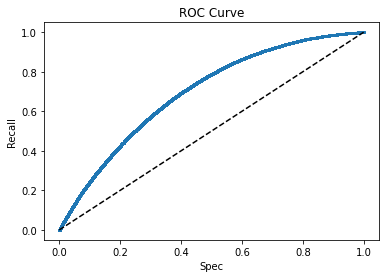

AUC : 0.6970549315233912


In [227]:
fpr, tpr, threshold = roc_curve(y_test2, model.decision_function(X_test2))

plt.plot(fpr, tpr, 'o-', ms = 2, label="Log Reg")
plt.legend
plt.plot([0,1],[0,1], 'k--', label="abs")
plt.xlabel('Spec')
plt.ylabel('Recall')
plt.title('ROC Curve')
plt.show()

print('AUC : {}'.format(auc(fpr, tpr)))

Random Forest classifier

In [229]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
pred_lr = model.predict(X_test)
print('-'*30)
print('Accuracy of RandomForestClassifier: {:.2f}'.format(accuracy_score(pred_lr,y_test)*100))
print('-'*40)

------------------------------
Accuracy of RandomForestClassifier: 84.26
----------------------------------------


In [230]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,f1,support=score(y_test, pred_lr,average='weighted')
print('Precision: {0:.2f}, Recall: {1:.2f}, F1: {2:.2f}'.format(precision, recall, f1))

Precision: 0.78, Recall: 0.84, F1: 0.77


kNN classifier

In [234]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)
pred_lr = model.predict(X_test)
print('-'*30)
print('Accuracy of kNNClassifier: {:.2f}'.format(accuracy_score(pred_lr,y_test)*100))
print('-'*40)

------------------------------
Accuracy of kNNClassifier: 82.16
----------------------------------------


In [235]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,f1,support=score(y_test, pred_lr,average='weighted')
print('Precision: {0:.2f}, Recall: {1:.2f}, F1: {2:.2f}'.format(precision, recall, f1))

Precision: 0.75, Recall: 0.82, F1: 0.78


Gradient Boosting classifier

In [236]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=200)
model.fit(X_train,y_train)
pred_lr = model.predict(X_test)
print('-'*30)
print('Accuracy of GradientBoostingClassifier: {:.2f}'.format(accuracy_score(pred_lr,y_test)*100))
print('-'*40)

------------------------------
Accuracy of GradientBoostingClassifier: 84.23
----------------------------------------


In [237]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,f1,support=score(y_test, pred_lr,average='weighted')
print('Precision: {0:.2f}, Recall: {1:.2f}, F1: {2:.2f}'.format(precision, recall, f1))

Precision: 0.78, Recall: 0.84, F1: 0.77


AdaBoost classifier

In [238]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train,y_train)
pred_lr = model.predict(X_test)
print('-'*30)
print('Accuracy of AdaBoostClassifier: {:.2f}'.format(accuracy_score(pred_lr,y_test)*100))
print('-'*40)

------------------------------
Accuracy of AdaBoostClassifier: 84.20
----------------------------------------


In [239]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,f1,support=score(y_test, pred_lr,average='weighted')
print('Precision: {0:.2f}, Recall: {1:.2f}, F1: {2:.2f}'.format(precision, recall, f1))

Precision: 0.78, Recall: 0.84, F1: 0.77
